In [1]:
# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# my modules
import prepare as prep
import acquire as acq
import auto_model as atm
import os 

In [6]:
sql_query = "select * from passengers"
directory = os.getcwd()
url_for_query = acq.get_db_url("titanic_db")
filename = "titanic_passangers.csv"

titanic = acq.get_sql_data(sql_query, directory, url_for_query, filename)

In [7]:
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])

In [8]:
dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [9]:
titanic_train, titanic_validate, titanic_test = prep.split_function(titanic, 'survived')

In [10]:
baseline = (titanic_train.survived == titanic_train.survived.value_counts().idxmax()).mean()
baseline

0.6161048689138576

In [ ]:
#I would explore the data at this point but that has been done

In [11]:
X_train = titanic_train.drop(columns = ['survived','sex','passenger_id','embark_town'])

In [12]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [13]:
X_validate = titanic_validate.drop(columns = ['survived','sex','passenger_id','embark_town'])
X_test = titanic_test.drop(columns = ['survived','sex','passenger_id','embark_town'])

In [14]:
target = "survived"

In [15]:
y_train = titanic_train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [16]:
y_validate = titanic_validate[target]
y_test = titanic_test[target]

In [13]:
knn5 = KNeighborsClassifier() #the default are n_neighbors=5 and weights="uniform"

In [14]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred5 = knn5.predict(X_train)

In [16]:
y_pred_proba5 = knn5.predict_proba(X_train) #Note: returns an array

In [17]:
knn5.score(X_train,y_train)

0.8146067415730337

In [18]:
y_pred_proba5[:5]

array([[0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ]])

In [20]:
knn5.classes_ #shows you the classes of prediction cata

array([0, 1])

In [21]:
#accarcy time 

pd.crosstab(y_train, y_pred5) #rows are acctuals and columns are predictions 

col_0,0,1
survived,,
0,285,44
1,55,150


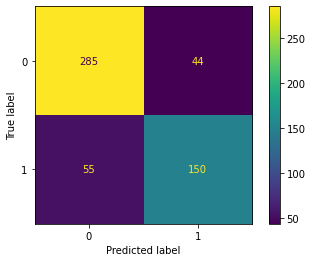

In [22]:
plot_confusion_matrix(knn5, X_train, y_train)

In [36]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       329
           1       0.77      0.73      0.75       205

    accuracy                           0.81       534
   macro avg       0.81      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [24]:
TP = 150 
TN = 285
FP = 44
FN = 55

In [25]:
all_ = (TP + TN + FP + FN) #save output as dictionary then DF make into function 

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8146067415730337

True Positive Rate/Sensitivity/Recall/Power: 0.7317073170731707
False Positive Rate/False Alarm Ratio/Fall-out: 0.1337386018237082
True Negative Rate/Specificity/Selectivity: 0.8662613981762918
False Negative Rate/Miss Rate: 0.2682926829268293

Precision/PPV: 0.7731958762886598
F1 Score: 0.7518796992481203

Support (0): 205
Support (1): 329


k number = 10 accuracy = (0.7771535580524345, 0.7134831460674157)
k number = 20 accuracy = (0.7434456928838952, 0.6629213483146067)


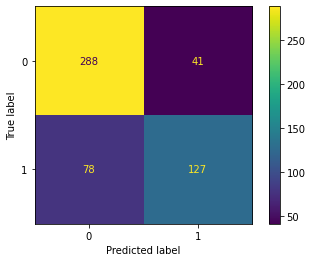

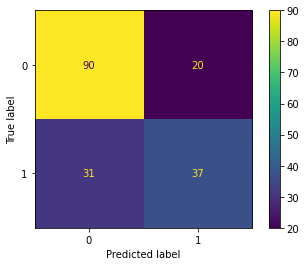

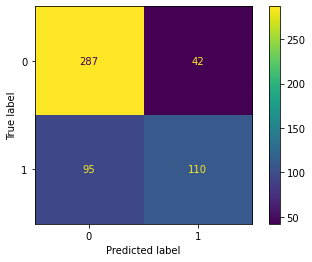

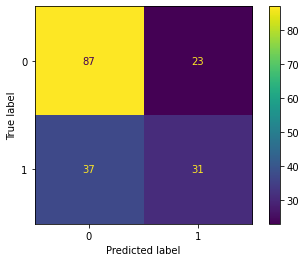

In [38]:
#Loop for knn

scores_all = []
k_range=[10,20]

for x in k_range:
    
    #make it
    knnx = KNeighborsClassifier(n_neighbors=x ) #increases the k number
    #fit it
    knnx.fit(X_train, y_train)
    #transform it
    train_acc = knnx.score(X_train, y_train)
    
    plot_confusion_matrix(knnx, X_train, y_train)
    
    #evaluate on my validate data
    val_acc = knnx.score(X_validate, y_validate)
    
    plot_confusion_matrix(knnx, X_validate, y_validate)
    
    print(f'k number = {x} accuracy = {train_acc, val_acc}')

    scores_all.append([x, train_acc, val_acc])

In [39]:
scores_all

[[10, 0.7771535580524345, 0.7134831460674157],
 [20, 0.7434456928838952, 0.6629213483146067]]

In [31]:
scores_df = pd.DataFrame(scores_all, columns=['k number','train_acc','val_acc']) #data frame listing all train scores v. value scores
scores_df["diff"] = scores_df.train_acc - scores_df.val_acc
scores_df

,k number,train_acc,val_acc,diff
0,10,0.777154,0.713483,0.063670
1,20,0.743446,0.662921,0.080524


In [37]:
def print_cm_metrics(conf):
    tn, fp, fn, tp = conf.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }
    return pd.dataFrame(dict)


------------------------ Train Model with K range of 10 ------------------------------


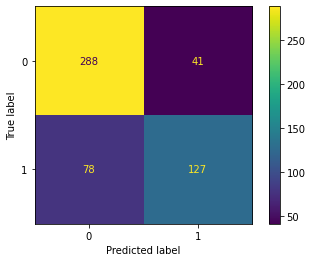

                metric       score
0             accuracy    0.777154
1   true_positive_rate    0.619512
2  false_positive_rate    0.124620
3   true_negative_rate    0.875380
4  false_negative_rate    0.380488
5            precision    0.755952
6               recall    0.619512
7             f1_score    0.680965
8          support_pos  205.000000
9          support_neg  329.000000

---------------------Validate Model with K range of 10---------------------------------


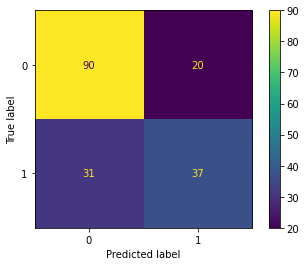

                metric       score
0             accuracy    0.713483
1   true_positive_rate    0.544118
2  false_positive_rate    0.181818
3   true_negative_rate    0.818182
4  false_negative_rate    0.455882
5            precision    0.649123
6               recall    0.544118
7             f1_score    0.592000
8          support_pos   68.000000
9          support_neg  110.000000

k number = 10 accuracy = (0.7771535580524345, 0.7134831460674157)

------------------------ Train Model with K range of 20 ------------------------------


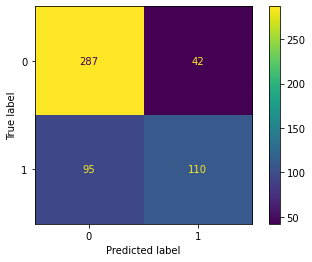

                metric       score
0             accuracy    0.743446
1   true_positive_rate    0.536585
2  false_positive_rate    0.127660
3   true_negative_rate    0.872340
4  false_negative_rate    0.463415
5            precision    0.723684
6               recall    0.536585
7             f1_score    0.616246
8          support_pos  205.000000
9          support_neg  329.000000

---------------------Validate Model with K range of 20---------------------------------


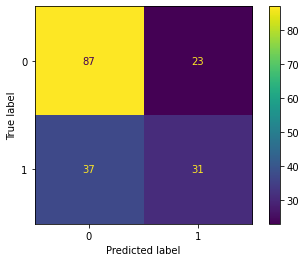

                metric       score
0             accuracy    0.662921
1   true_positive_rate    0.455882
2  false_positive_rate    0.209091
3   true_negative_rate    0.790909
4  false_negative_rate    0.544118
5            precision    0.574074
6               recall    0.455882
7             f1_score    0.508197
8          support_pos   68.000000
9          support_neg  110.000000

k number = 20 accuracy = (0.7434456928838952, 0.6629213483146067)


In [55]:
scores_all = []
k_range=[10,20] #make this into a function and split the train and validate (drop validate and genericfy)

for x in k_range:
    
    #make it
    knnx = KNeighborsClassifier(n_neighbors=x) #increases the k number
    #fit it
    knnx.fit(X_train, y_train)
    #transform it
    train_acc = knnx.score(X_train, y_train)
    y_pred = knnx.predict(X_train)
    
    conf = confusion_matrix(y_train, y_pred)
    TN, FP, FN, TP = conf.ravel()

    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_
    print(f"\n------------------------ Train Model with K range of {x} ------------------------------")
    plot_confusion_matrix(knnx, X_train, y_train)
    plt.show()
    print(print_cm_metrics(conf)) 
    
    #evaluate on my validate data
    val_acc = knnx.score(X_validate, y_validate)
    y_vpred = knnx.predict(X_validate)
    conf = confusion_matrix(y_validate, y_vpred)
    TN, FP, FN, TP = conf.ravel()

    

    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_
    print(f"\n---------------------Validate Model with K range of {x}---------------------------------")
    plot_confusion_matrix(knnx, X_validate, y_validate)
    plt.show()
    (print_cm_metrics(conf))
    print(f'\nk number = {x} accuracy = {train_acc, val_acc}')

    scores_all.append([x, train_acc, val_acc]) 

In [22]:
k_range = [10,20]


------------------------ Train Model with K range of 1 ------------------------------


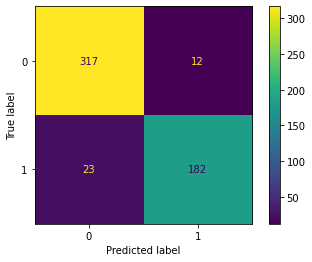

                    0           1  accuracy   macro avg  weighted avg
precision    0.932353    0.938144  0.934457    0.935249      0.934576
recall       0.963526    0.887805  0.934457    0.925665      0.934457
f1-score     0.947683    0.912281  0.934457    0.929982      0.934092
support    329.000000  205.000000  0.934457  534.000000    534.000000
                metric       score
0             accuracy    0.934457
1   true_positive_rate    0.887805
2  false_positive_rate    0.036474
3   true_negative_rate    0.963526
4  false_negative_rate    0.112195
5            precision    0.938144
6               recall    0.887805
7             f1_score    0.912281
8          support_pos  205.000000
9          support_neg  329.000000

---------------------Validate Model with K range of 1---------------------------------


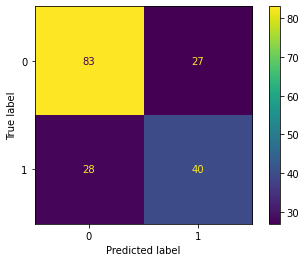

                    0           1  accuracy   macro avg  weighted avg
precision    0.932353    0.938144  0.934457    0.935249      0.934576
recall       0.963526    0.887805  0.934457    0.925665      0.934457
f1-score     0.947683    0.912281  0.934457    0.929982      0.934092
support    329.000000  205.000000  0.934457  534.000000    534.000000
                metric       score
0             accuracy    0.691011
1   true_positive_rate    0.588235
2  false_positive_rate    0.245455
3   true_negative_rate    0.754545
4  false_negative_rate    0.411765
5            precision    0.597015
6               recall    0.588235
7             f1_score    0.592593
8          support_pos   68.000000
9          support_neg  110.000000

k number = 1 accuracy = (0.9344569288389513, 0.6910112359550562)

------------------------ Train Model with K range of 5 ------------------------------


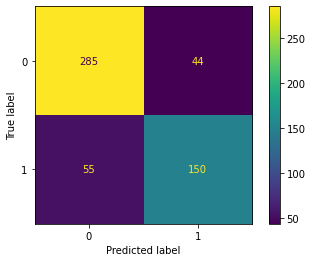

                    0           1  accuracy   macro avg  weighted avg
precision    0.838235    0.773196  0.814607    0.805716      0.813267
recall       0.866261    0.731707  0.814607    0.798984      0.814607
f1-score     0.852018    0.751880  0.814607    0.801949      0.813575
support    329.000000  205.000000  0.814607  534.000000    534.000000
                metric       score
0             accuracy    0.814607
1   true_positive_rate    0.731707
2  false_positive_rate    0.133739
3   true_negative_rate    0.866261
4  false_negative_rate    0.268293
5            precision    0.773196
6               recall    0.731707
7             f1_score    0.751880
8          support_pos  205.000000
9          support_neg  329.000000

---------------------Validate Model with K range of 5---------------------------------


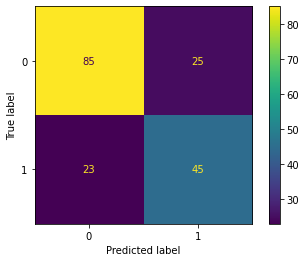

                    0           1  accuracy   macro avg  weighted avg
precision    0.838235    0.773196  0.814607    0.805716      0.813267
recall       0.866261    0.731707  0.814607    0.798984      0.814607
f1-score     0.852018    0.751880  0.814607    0.801949      0.813575
support    329.000000  205.000000  0.814607  534.000000    534.000000
                metric       score
0             accuracy    0.730337
1   true_positive_rate    0.661765
2  false_positive_rate    0.227273
3   true_negative_rate    0.772727
4  false_negative_rate    0.338235
5            precision    0.642857
6               recall    0.661765
7             f1_score    0.652174
8          support_pos   68.000000
9          support_neg  110.000000

k number = 5 accuracy = (0.8146067415730337, 0.7303370786516854)


In [23]:
atm.auto_model_knn(X_train, y_train, X_validate, y_validate, k_range)